In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
customer=pd.read_csv('Customers.csv')
product=pd.read_csv('Products.csv')
transaction=pd.read_csv('Transactions.csv')

In [2]:
customer.info()
product.info()
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [3]:
#to get first five records from each datasets
customer.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
print(customer.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [7]:
print(product.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [8]:
print(transaction.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
merged_data = transaction.merge(customer, on='CustomerID', how='left')
merged_data = merged_data.merge(product, on='ProductID', how='left')


In [10]:
print("\nMissing Values:")
print(merged_data.isnull().sum())



Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [11]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_transactions = merged_data.groupby('Month').size()


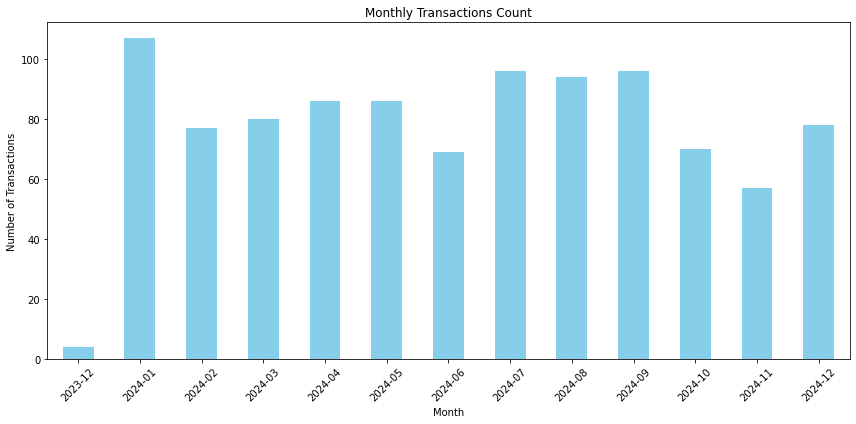

In [12]:
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar', color='skyblue')
plt.title('Monthly Transactions Count')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_transactions_count.png')
plt.show()


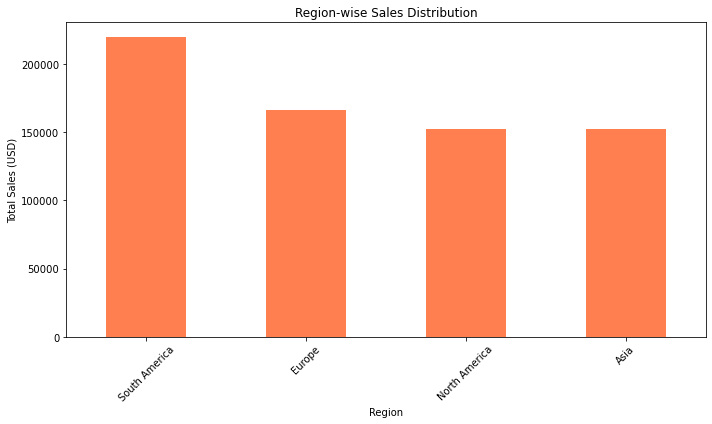

In [13]:
## Region-wise Sales Distribution
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='coral')
plt.title('Region-wise Sales Distribution')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('region_sales_distribution.png')
plt.show()


In [14]:
## Top 5 Products by Sales
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales:")
print(product_sales)



Top 5 Products by Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [15]:
## Top 5 Customers by Transaction Value
customer_sales = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Transaction Value:")
print(customer_sales)



Top 5 Customers by Transaction Value:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


In [37]:
# Save insights to a text file
with open('EDA_Insights.pdf', 'w') as f:
    f.write("Top 5 Products by Sales:\n")
    f.write(product_sales.to_string())
    f.write("\n\nTop 5 Customers by Transaction Value:\n")
    f.write(customer_sales.to_string())
    f.write("\n\nRegion-wise Sales:\n")
    f.write(region_sales.to_string())


In [38]:
open('EDA_Insights.pdf','r')

<_io.TextIOWrapper name='EDA_Insights.pdf' mode='r' encoding='cp1252'>